In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('dataset.csv')
#showing our initial dataframe here
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,DATE_OF_DEATH,INTUBATED,PNEUMONIA,AGE,NATIONALITY,PREGNANCY,SPEAKS_NATIVE_LANGUAGE,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,NaN,97,2,60,1,2,2,2,2,2,2,1,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,NaN,2,1,35,1,97,2,2,2,2,2,1,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,NaN,97,2,51,1,2,2,1,2,2,2,2,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,NaN,97,2,48,1,97,2,2,2,2,2,2,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,2020-05-04,97,2,69,1,97,2,1,2,2,1,2,2,2,2,2,2,99,1,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,2,25,25,9,1,2020-06-02,2020-05-23,NaN,97,2,37,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,99,97
159789,USMER,SSA,22,1,22,22,12,2,2020-06-04,2020-06-02,NaN,2,2,43,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,99,2
159790,OUTSIDE USMER,SSA,12,2,12,12,50,1,2020-06-04,2020-06-03,NaN,97,2,31,1,97,2,2,2,2,2,2,2,2,1,2,2,1,1,99,99,97
159791,OUTSIDE USMER,IMSS,15,2,15,15,39,1,2020-06-04,2020-06-02,NaN,97,2,40,1,97,2,2,2,2,2,1,2,2,2,2,2,99,1,99,99,97


In [3]:
## Question 1
unmodified = dataframe

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,DATE_OF_DEATH,INTUBATED,PNEUMONIA,AGE,NATIONALITY,PREGNANCY,SPEAKS_NATIVE_LANGUAGE,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,NaN,DOES NOT APPLY,NO,60,MEXICAN,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,NaN,NO,YES,35,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,NaN,DOES NOT APPLY,NO,51,MEXICAN,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,NaN,DOES NOT APPLY,NO,48,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,2020-05-04,DOES NOT APPLY,NO,69,MEXICAN,DOES NOT APPLY,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,NaN,DOES NOT APPLY,NO,37,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,NaN,NO,NO,43,MEXICAN,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,NaN,DOES NOT APPLY,NO,31,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,NaN,DOES NOT APPLY,NO,40,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [4]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'q1.csv')

### Question 2

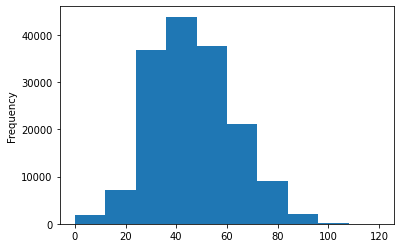

In [5]:
## Question 2
dataframe["AGE"].plot(kind="hist", bins=10)

### Question 3

In [6]:
## Question 3
bins = [0,10,20,30,40,50,60,70,80,90,100]

group = dataframe.groupby(['SEX',pd.cut(dataframe.AGE, bins)])
group.size().unstack()
#

AGE,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
SEX,,,,,,,,,,
Female,729,1888,11223,16390,16240,12388,7212,3628,1443,209
Male,783,1886,11823,19313,20026,17013,10241,5162,1691,216


### Question 4

In [7]:
## Question 4
filter = dataframe['INTUBATED'] == 'YES'
dataframe[filter].shape[0]

4828

### Question 5

In [ ]:
## Question 5


### Question 6

In [8]:
## Question 6
filter = dataframe['DATE_OF_DEATH'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()

'HYPERTENSION'

### Question 7

In [11]:
## Question 8
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [12]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [13]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,DATE_OF_DEATH,INTUBATED,PNEUMONIA,AGE,NATIONALITY,PREGNANCY,SPEAKS_NATIVE_LANGUAGE,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,NaN,DOES NOT APPLY,NO,60,MEXICAN,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,NaN,NO,YES,35,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,NaN,DOES NOT APPLY,NO,51,MEXICAN,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,NaN,DOES NOT APPLY,NO,48,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,2020-05-04,DOES NOT APPLY,NO,69,MEXICAN,DOES NOT APPLY,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,NaN,DOES NOT APPLY,NO,37,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,NaN,NO,NO,43,MEXICAN,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,NaN,DOES NOT APPLY,NO,31,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,NaN,DOES NOT APPLY,NO,40,MEXICAN,DOES NOT APPLY,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [14]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [15]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [16]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [17]:
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [18]:
df1.shape

(51164, 32)

In [19]:
df1.drop(['BIRTHPLACE_LOCATION', 'DATE_OF_FIRST_SYMPTOM', 'DATE_OF_DEATH', 'MUNICIPALITY', 'COUNTRY OF ORIGIN'], axis=1, inplace=True)
df1.shape

(51164, 27)

In [20]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,TREATMENT_LOCATION,PATIENT_LOCATION,AGE,ICU,ORIGIN_OUTSIDE USMER,ORIGIN_USMER,SECTOR_ACADEMIC,SECTOR_DIF,SECTOR_IMSS,SECTOR_ISSSTE,SECTOR_MUNICIPAL,SECTOR_NOT SPECIFIED,SECTOR_PEMEX,SECTOR_PRIVATE,SECTOR_RED CROSS,SECTOR_SEDENA,SECTOR_SEMAR,SECTOR_SSA,SECTOR_STATE,SEX_ Female,SEX_ Male,HOSPITALIZED_YES,ADMISSION DATE_2020-02-27,ADMISSION DATE_2020-03-02,ADMISSION DATE_2020-03-04,ADMISSION DATE_2020-03-08,ADMISSION DATE_2020-03-09,ADMISSION DATE_2020-03-10,ADMISSION DATE_2020-03-11,ADMISSION DATE_2020-03-12,ADMISSION DATE_2020-03-13,ADMISSION DATE_2020-03-14,ADMISSION DATE_2020-03-15,ADMISSION DATE_2020-03-16,ADMISSION DATE_2020-03-17,ADMISSION DATE_2020-03-18,ADMISSION DATE_2020-03-19,ADMISSION DATE_2020-03-20,ADMISSION DATE_2020-03-21,ADMISSION DATE_2020-03-22,...,SPEAKS_NATIVE_LANGUAGE_NO,SPEAKS_NATIVE_LANGUAGE_UNKNOWN,SPEAKS_NATIVE_LANGUAGE_YES,DIABETES_IGNORED,DIABETES_NO,DIABETES_YES,COPD_IGNORED,COPD_NO,COPD_YES,ASTHMA_IGNORED,ASTHMA_NO,ASTHMA_YES,INMUSUPR_IGNORED,INMUSUPR_NO,INMUSUPR_YES,HYPERTENSION_IGNORED,HYPERTENSION_NO,HYPERTENSION_YES,OTHER_DISEASE_IGNORED,OTHER_DISEASE_NO,OTHER_DISEASE_YES,CARDIOVASCULAR_IGNORED,CARDIOVASCULAR_NO,CARDIOVASCULAR_YES,OBESITY_IGNORED,OBESITY_NO,OBESITY_YES,CHRONIC_KIDNEY_IGNORED,CHRONIC_KIDNEY_NO,CHRONIC_KIDNEY_YES,TOBACCO_IGNORED,TOBACCO_NO,TOBACCO_YES,ANOTHER CASE_NO,ANOTHER CASE_UNKNOWN,ANOTHER CASE_YES,OUTCOME_POSITIVE,MIGRANT_NO,MIGRANT_UNKNOWN,MIGRANT_YES
1,15,15,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
5,15,15,79,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
6,15,15,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0
7,15,15,66,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
14,15,15,43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [21]:
y = df1.ICU
X = df1.drop("ICU", 1)
colnames = X.columns
pd.DataFrame.to_csv(df1, 'cleaned.csv')

### Question 8

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1) 

rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

rf.fit(X_train, y_train)

accuracy_score(y_test, rf.predict(X_test))

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	176
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	5
Rejected: 	156
Iteration: 	16 / 100
Confirmed: 	15
Tenta

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=116,
                                          random_state=RandomState(MT19937) at 0x7F6F7A4F6490),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6F7A4F6490, verbose=2)

In [23]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [  1   1   1   4   1 128 153   1   1  96  31   7   1 153   2   1   1   7
   9   7 153  88 153 153 153 153  98  24 123 153 153 136 153 141 145  37
 144 107  48  63 153 138  38 122  86  70  81  57  59 109 136 104  65   2
  12 101  88  44 112  77  56  73  45  92  59  54 120  98  50  21 102  75
 140 105  76  29 125 135  80  90 142 113  82  48 111 134  93 100 129  74
  42 123 102  90  46 138 106 130  83 116 132 116 113  43  66  93  96  77
  67 116  68  88 110  51  72  62  35  64  68  40 118 132 130 142 146 153
   1   1   1   1  84  84   5 108  11 127  17  10  95  18  13  15  29  54
  61  13  22  59  20  48  53  33  27  26  19  32  28  34  40  35  23   1
   2  16  71  79  25  38  52   1   1   1 153 120 118 125]
No. of significant features:  17


In [24]:
boruta_score = ranking(list(map(float, boruta_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [25]:
print('---------Top 20----------')
display(boruta_score.head(20))

---------Top 20----------


,Features,Score
0,TREATMENT_LOCATION,1.00
12,SECTOR_PRIVATE,1.00
1,PATIENT_LOCATION,1.00
126,INTUBATED_NO,1.00
127,INTUBATED_YES,1.00
169,ANOTHER CASE_NO,1.00
128,PNEUMONIA_NO,1.00
170,ANOTHER CASE_UNKNOWN,1.00
16,SECTOR_SSA,1.00
171,ANOTHER CASE_YES,1.00


Text(0.5, 1.0, 'Boruta Top 20 Features')

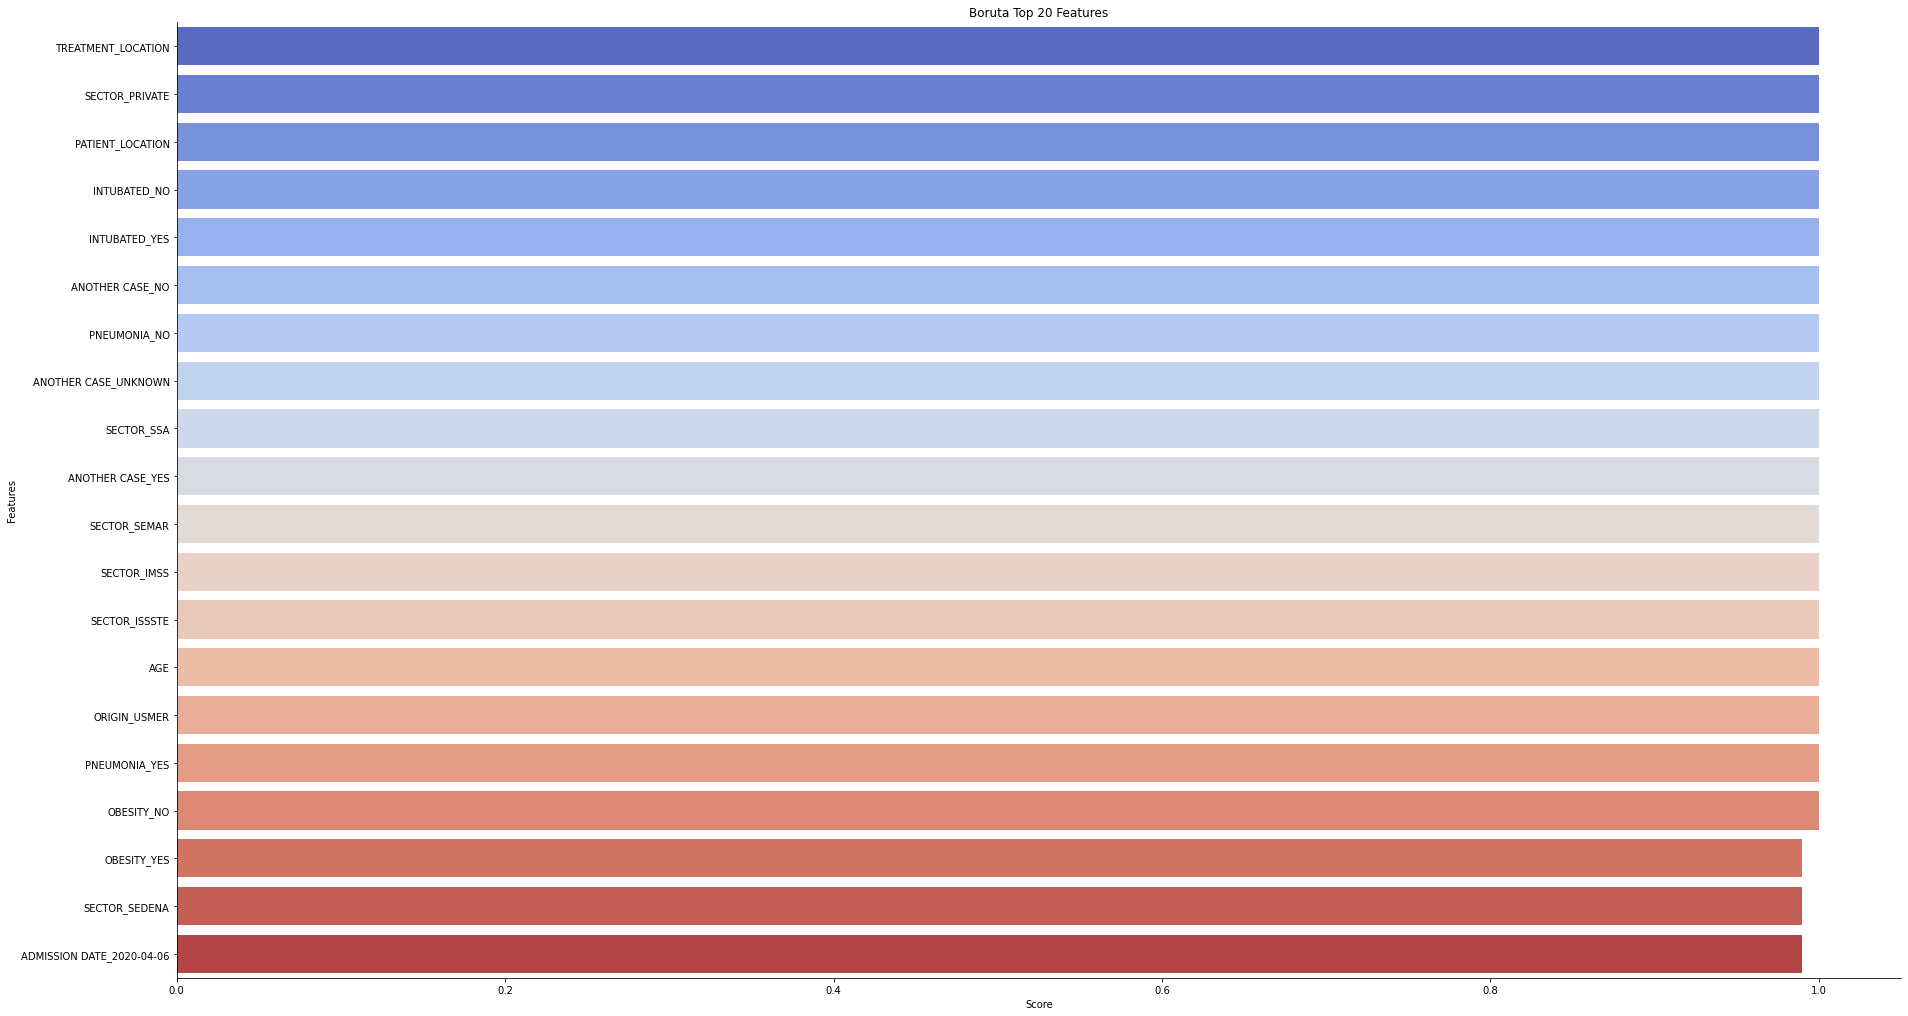

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

In [36]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [37]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [38]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

Text(0.5, 1.0, 'RFE Top 20 Features')

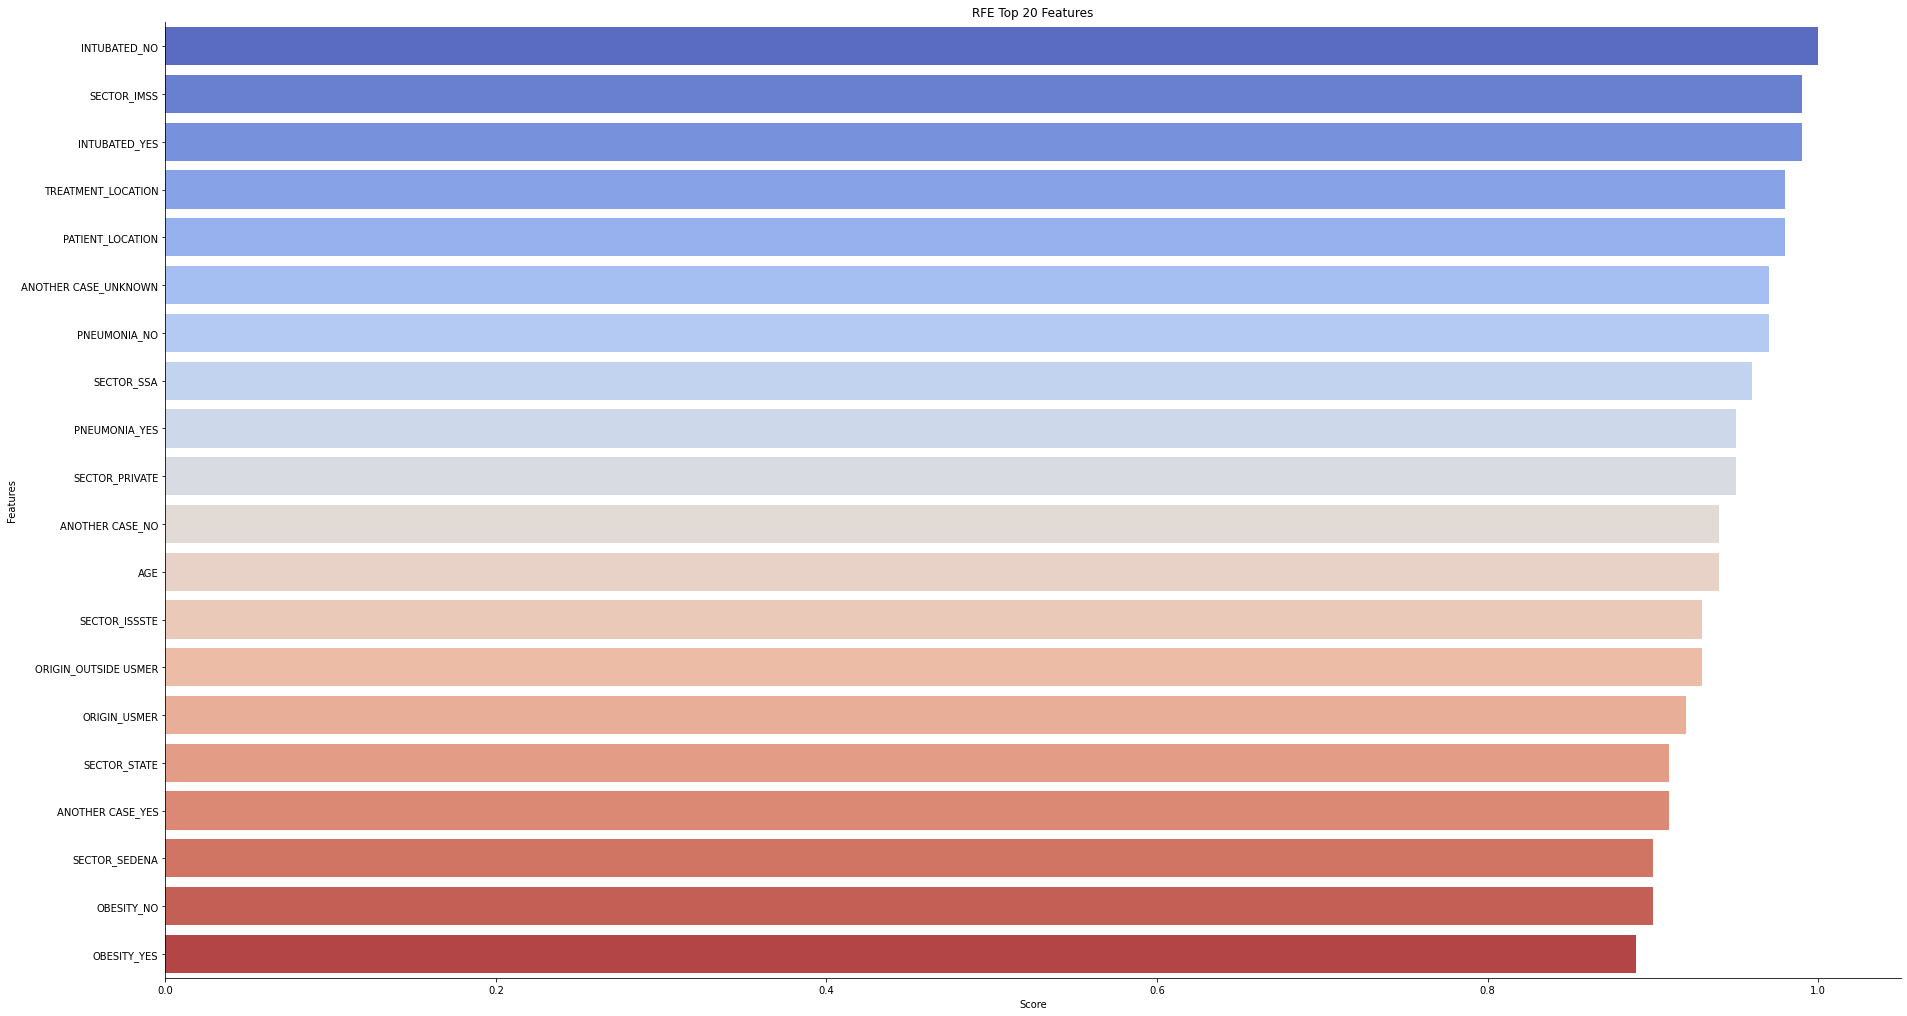

In [39]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

### Question 9

In [40]:
## Question 9

## Top N features of BORUTA
top_20_features = boruta_score.Features[:20].tolist()
top_20_features

['TREATMENT_LOCATION',
 'SECTOR_PRIVATE',
 'PATIENT_LOCATION',
 'INTUBATED_NO',
 'INTUBATED_YES',
 'ANOTHER CASE_NO',
 'PNEUMONIA_NO',
 'ANOTHER CASE_UNKNOWN',
 'SECTOR_SSA',
 'ANOTHER CASE_YES',
 'SECTOR_SEMAR',
 'SECTOR_IMSS',
 'SECTOR_ISSSTE',
 'AGE',
 'ORIGIN_USMER',
 'PNEUMONIA_YES',
 'OBESITY_NO',
 'OBESITY_YES',
 'SECTOR_SEDENA',
 'ADMISSION DATE_2020-04-06']

In [41]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9228965112870126
Top  6 features :  0.9227987882341444
Top  7 features :  0.9213329424411218
Top  8 features :  0.9199648197009674
Top  9 features :  0.9229942343398808
Top  10 features :  0.9222124499169354
Top  11 features :  0.9235805726570898
Top  12 features :  0.9226033421284081
Top  13 features :  0.9255350337144532
Top  14 features :  0.9246555262386397
Top  15 features :  0.9240691879214307
Top  16 features :  0.9239714648685625
Top  17 features :  0.9244600801329034
Top  18 features :  0.9239714648685625
Top  19 features :  0.9248509723443761
Top  20 features :  0.9244600801329034


Text(0.5, 1.0, 'Score for Top N Features of Boruta')

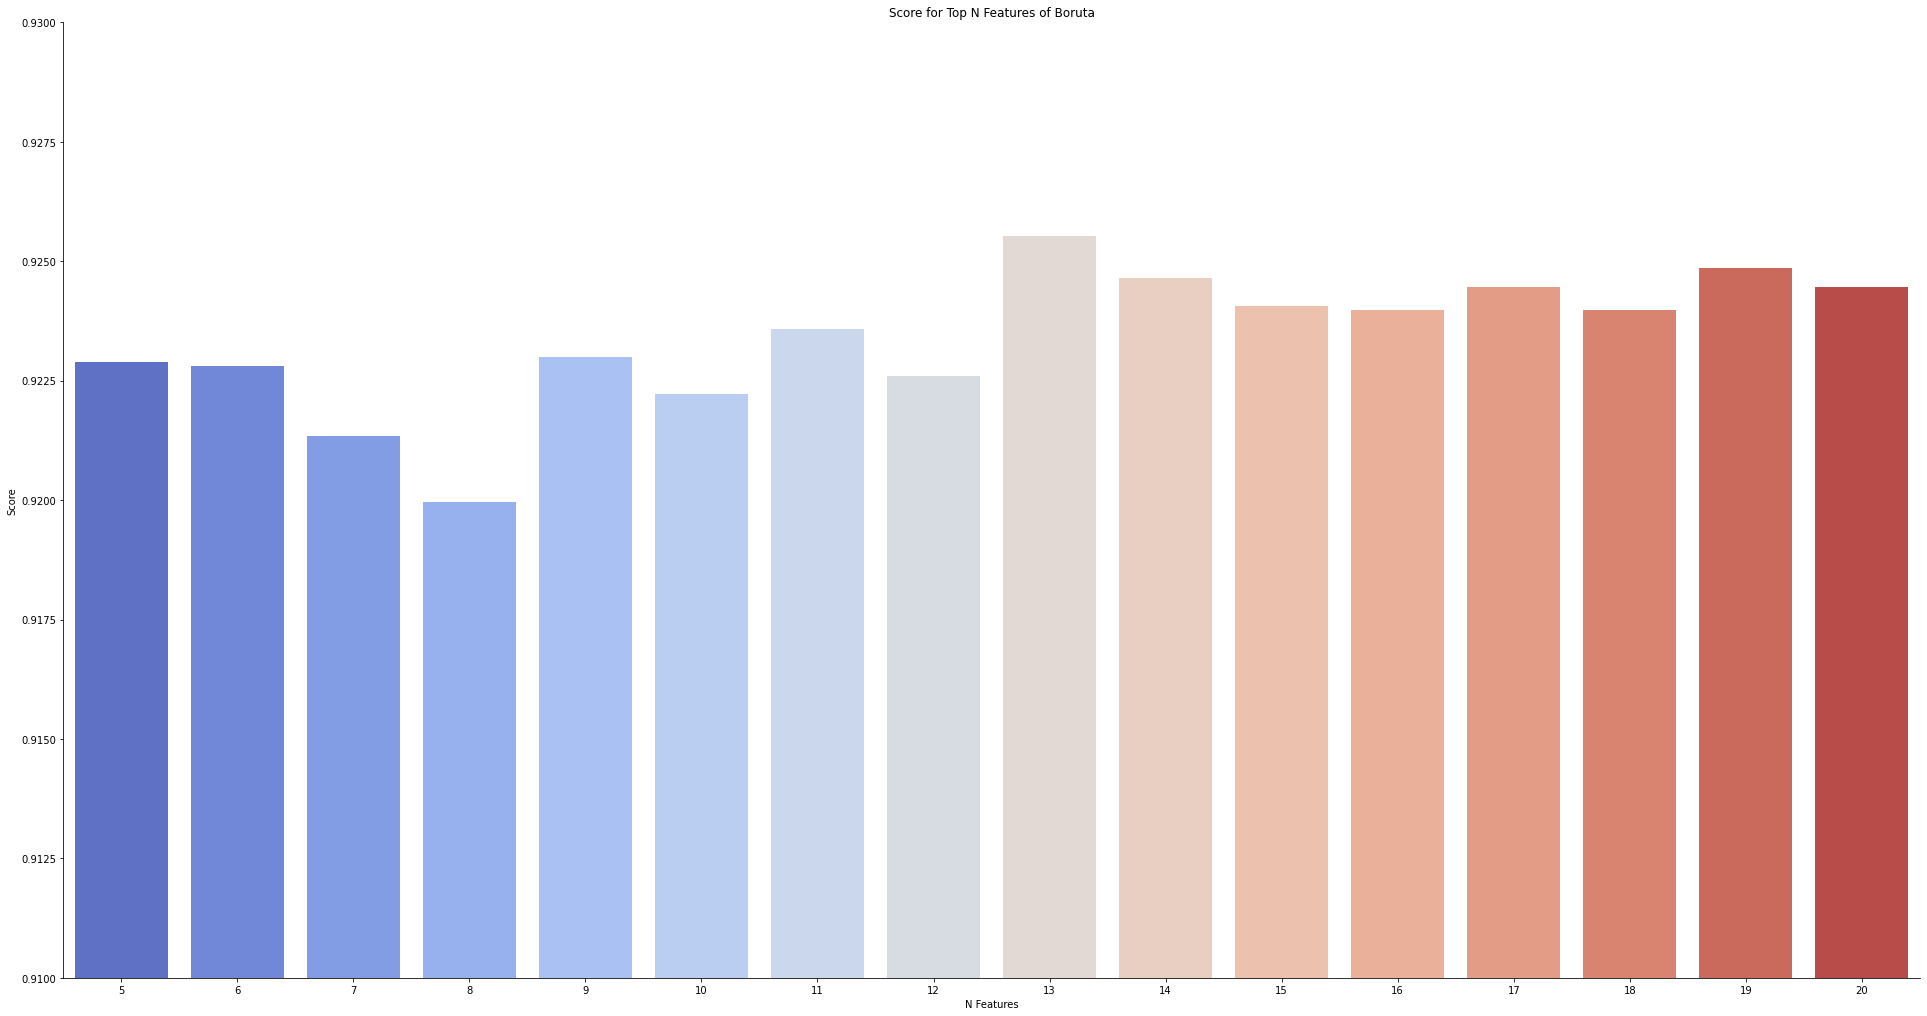

In [42]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of Boruta")

In [43]:
## Top N features of RFE
rfe_score
top_20_features = rfe_score.Features[:20].tolist()
top_20_features

['INTUBATED_NO',
 'SECTOR_IMSS',
 'INTUBATED_YES',
 'TREATMENT_LOCATION',
 'PATIENT_LOCATION',
 'ANOTHER CASE_UNKNOWN',
 'PNEUMONIA_NO',
 'SECTOR_SSA',
 'PNEUMONIA_YES',
 'SECTOR_PRIVATE',
 'ANOTHER CASE_NO',
 'AGE',
 'SECTOR_ISSSTE',
 'ORIGIN_OUTSIDE USMER',
 'ORIGIN_USMER',
 'SECTOR_STATE',
 'ANOTHER CASE_YES',
 'SECTOR_SEDENA',
 'OBESITY_NO',
 'OBESITY_YES']

In [44]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9221147268640673
Top  6 features :  0.9227010651812763
Top  7 features :  0.9218215577054627
Top  8 features :  0.9212352193882537
Top  9 features :  0.9222124499169354
Top  10 features :  0.92250561907554
Top  11 features :  0.9216261115997264
Top  12 features :  0.9218215577054627
Top  13 features :  0.9251441415029805
Top  14 features :  0.924264634027167
Top  15 features :  0.9243623570800352
Top  16 features :  0.9270008795074758
Top  17 features :  0.9249486953972442
Top  18 features :  0.9249486953972442
Top  19 features :  0.9254373106615851
Top  20 features :  0.9246555262386397


Text(0.5, 1.0, 'Score for Top N Features of RFE')

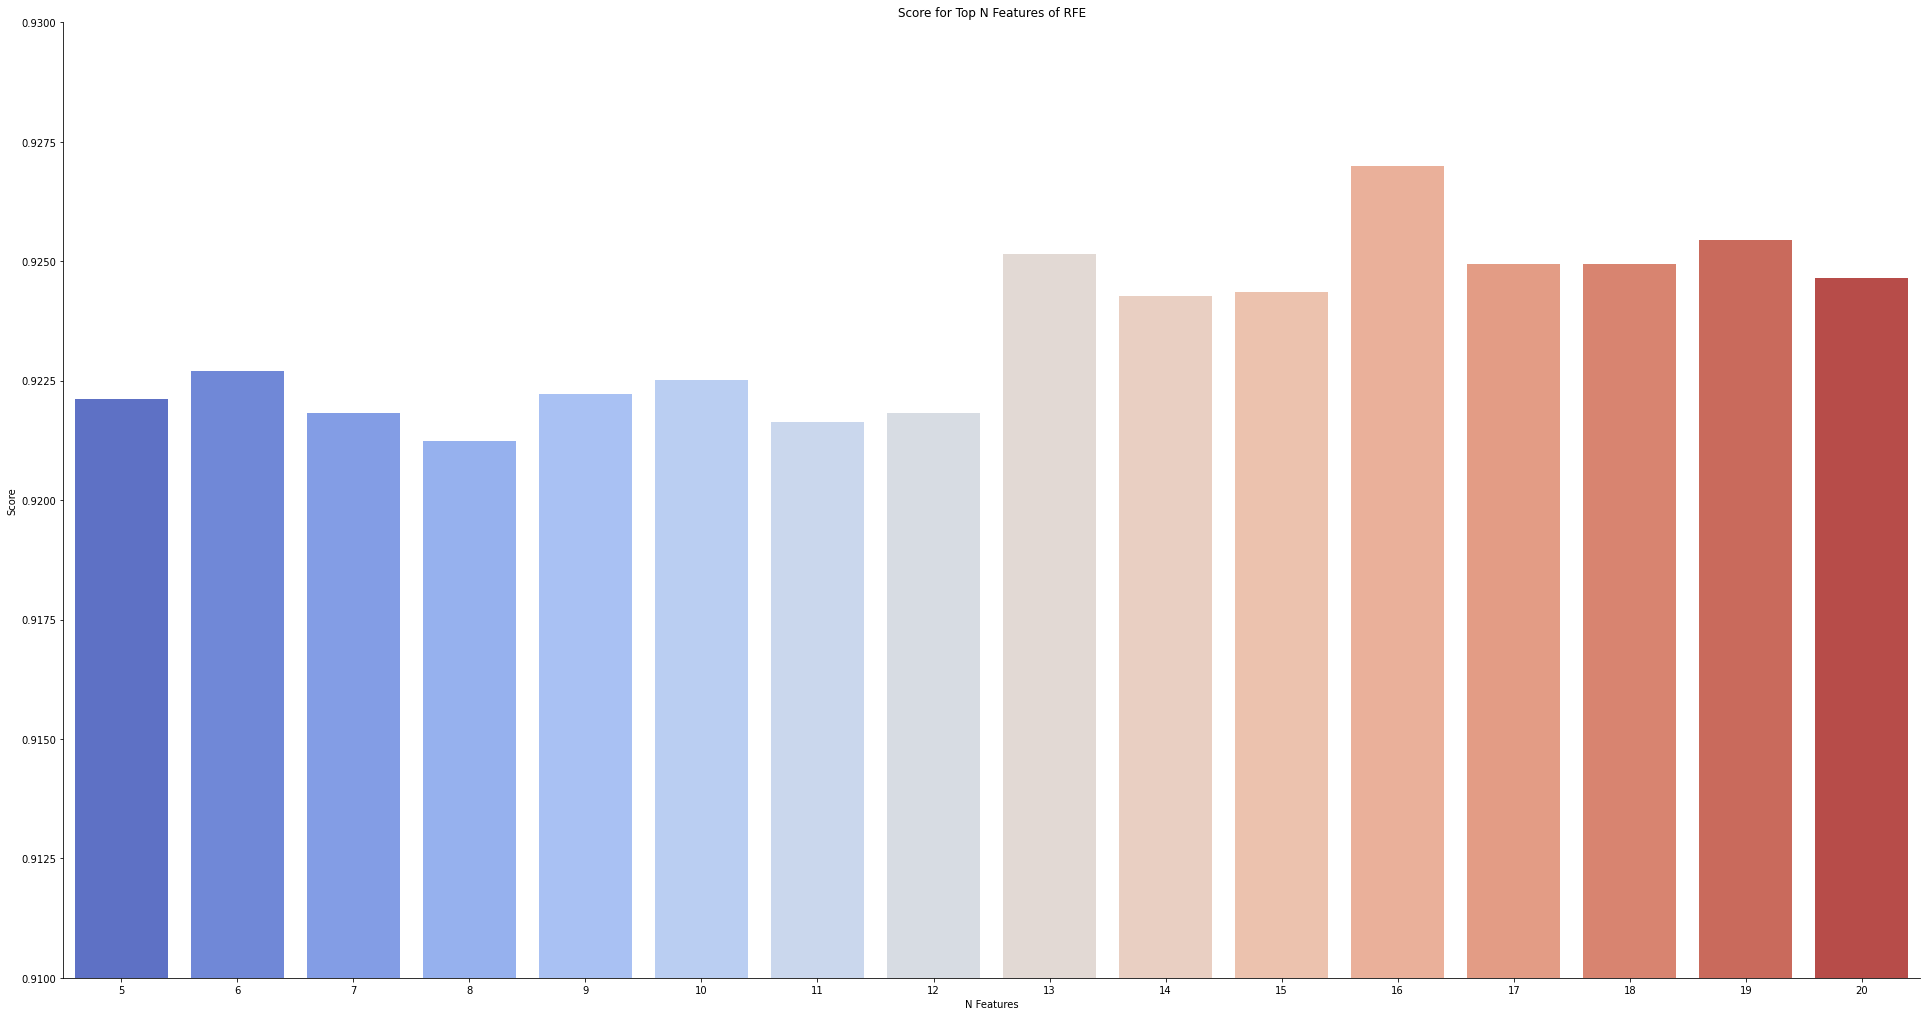

In [45]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of RFE")

### Question 10

In [64]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [67]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.443
Accuracy on test set: 0.436


In [68]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[5475 8528]
 [ 124 1223]]
**********************
Mjority TN=  5475
Mjority FP= 8528
Mjority FN=  124
Mjority TP=  1223
**********************
Precision= 0.13
Recall= 0.91
F1= 0.22
Accuracy= 0.44


In [69]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.76


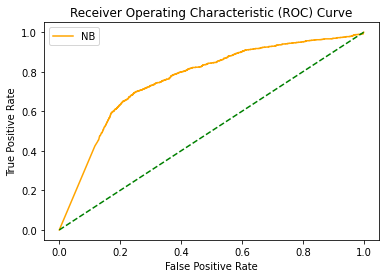

In [70]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 11

In [71]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [73]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.912


In [74]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[14003     0]
 [ 1347     0]]
**********************
Mjority TN=  14003
Mjority FP= 0
Mjority FN=  1347
Mjority TP=  0
**********************
Precision= 0.00
Recall= 0.00
F1= 0.00
Accuracy= 0.91


In [75]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.88


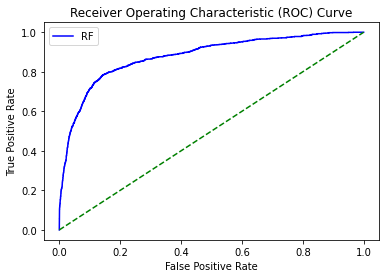

In [76]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 12

In [77]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [78]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.913


In [79]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[13700   303]
 [ 1038   309]]
**********************
Mjority TN=  13700
Mjority FP= 303
Mjority FN=  1038
Mjority TP=  309
**********************
Precision= 0.50
Recall= 0.23
F1= 0.32
Accuracy= 0.91


In [80]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.73


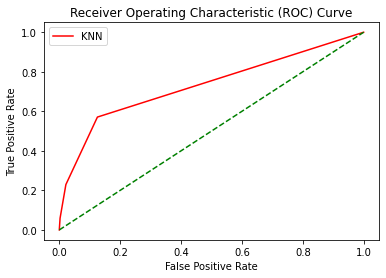

In [82]:
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 13

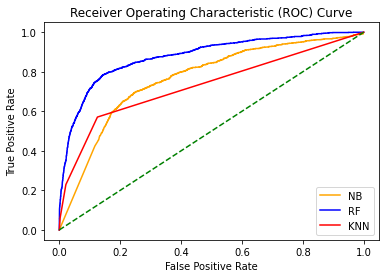

In [84]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

## Question 14

In [ ]:
## Question 14
